Evaluation Project - 7

Loan Application Status Prediction

Problem Statement:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

Note: The link of the dataset is below. 

Downlaod Files:
https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings
import seaborn as sns
import warnings

In [2]:
df=pd.read_csv("loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
for i in df:
    print(df[i].unique())

['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001280' 'LP001282' 'LP001289' 'LP001

In [6]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [7]:
df['Married']=df['Married'].fillna(df['Gender'].mode()[0])
df['Education']=df['Education'].fillna(df['Education'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [8]:
df.isnull().sum()  # All Null and nan value are filled with mean, median, and mode. No null value is present in data frame.

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
df['Married'].value_counts()

Yes     398
No      213
Male      3
Name: Married, dtype: int64

In [10]:
df.loc[df['Married'] == 'Male']

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,Male,0,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,Male,0,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,Male,0,Graduate,No,10047,0.0,128.0,240.0,1.0,Semiurban,Y


In [11]:
df.drop(index=[104,228,435],inplace=True)

In [12]:
df.reset_index(inplace=True)
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              611 non-null    int64  
 1   Loan_ID            611 non-null    object 
 2   Gender             611 non-null    object 
 3   Married            611 non-null    object 
 4   Dependents         611 non-null    object 
 5   Education          611 non-null    object 
 6   Self_Employed      611 non-null    object 
 7   ApplicantIncome    611 non-null    int64  
 8   CoapplicantIncome  611 non-null    float64
 9   LoanAmount         611 non-null    float64
 10  Loan_Amount_Term   611 non-null    float64
 11  Credit_History     611 non-null    float64
 12  Property_Area      611 non-null    object 
 13  Loan_Status        611 non-null    object 
dtypes: float64(4), int64(2), object(8)
memory usage: 67.0+ KB


In [14]:
df.drop(["Loan_ID","index"],inplace=True,axis=1)

In [15]:
for i in df.columns:
    print(df[i].value_counts())
    print("----------------------------------")

Male      500
Female    111
Name: Gender, dtype: int64
----------------------------------
Yes    398
No     213
Name: Married, dtype: int64
----------------------------------
0     357
1     102
2     101
3+     51
Name: Dependents, dtype: int64
----------------------------------
Graduate        477
Not Graduate    134
Name: Education, dtype: int64
----------------------------------
No     529
Yes     82
Name: Self_Employed, dtype: int64
----------------------------------
2500    9
2600    6
4583    6
6000    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 502, dtype: int64
----------------------------------
0.0       271
2083.0      5
1666.0      5
2500.0      5
1750.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64
----------------------------------
128.0    32
120.0    20
110.0    17
100.0    15
187.0    12
         ..
240.0     1
214.0

In [16]:
df['CoapplicantIncome']=df['CoapplicantIncome'].apply(np.int64)
df['LoanAmount']=df['LoanAmount'].apply(np.int64)
df['Loan_Amount_Term']=df['Loan_Amount_Term'].apply(np.int64)
df['Credit_History']=df['Credit_History'].apply(np.int64)

In [17]:
df.dtypes

Gender               object
Married              object
Dependents           object
Education            object
Self_Employed        object
ApplicantIncome       int64
CoapplicantIncome     int64
LoanAmount            int64
Loan_Amount_Term      int64
Credit_History        int64
Property_Area        object
Loan_Status          object
dtype: object

In [18]:
category_col=[]
for i in df.dtypes.index:
    if df.dtypes[i] == "object":
        category_col.append(i)
print(category_col)
    

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [19]:
num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i] != "object":
        num_col.append(i)
print(num_col)


['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [20]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,611.000000,611.000000,611.000000,611.000000,611.000000
mean,5399.513912,1627.970540,145.738134,341.911620,0.854337
std,6120.764249,2931.748366,84.307304,64.151246,0.353057
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2875.500000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1213.000000,128.000000,360.000000,1.000000
75%,5790.000000,2304.000000,165.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


<AxesSubplot:>

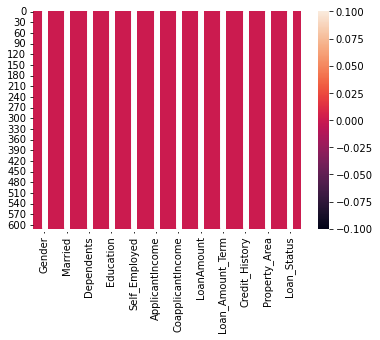

In [21]:
sns.heatmap(df.isnull(),annot=True)

In [22]:
#index=np.where(df['ApplicantIncome'] > higher_side)
#index

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


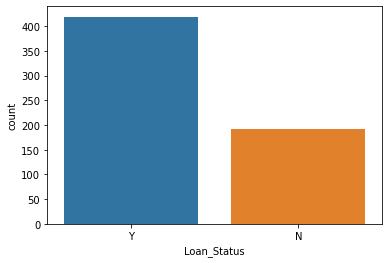

In [23]:
sns.countplot(df['Loan_Status'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


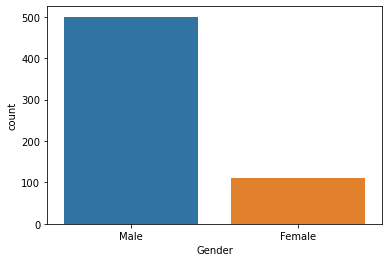

In [24]:
sns.countplot(df['Gender'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


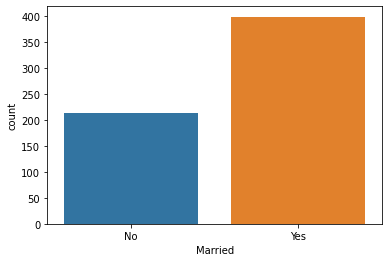

In [25]:
sns.countplot(df['Married'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


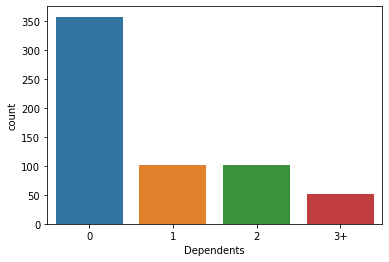

In [26]:
sns.countplot(df['Dependents'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


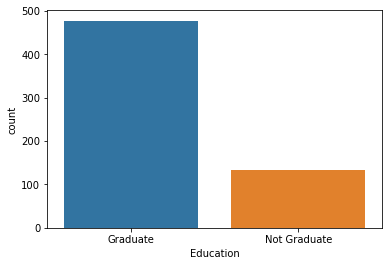

In [27]:
sns.countplot(df['Education'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


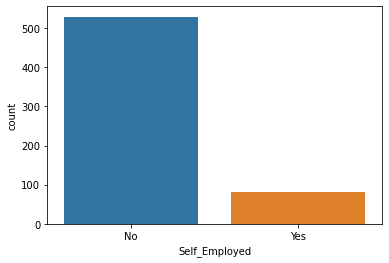

In [28]:
sns.countplot(df['Self_Employed'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


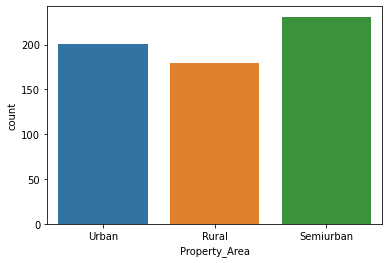

In [29]:
sns.countplot(df['Property_Area'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

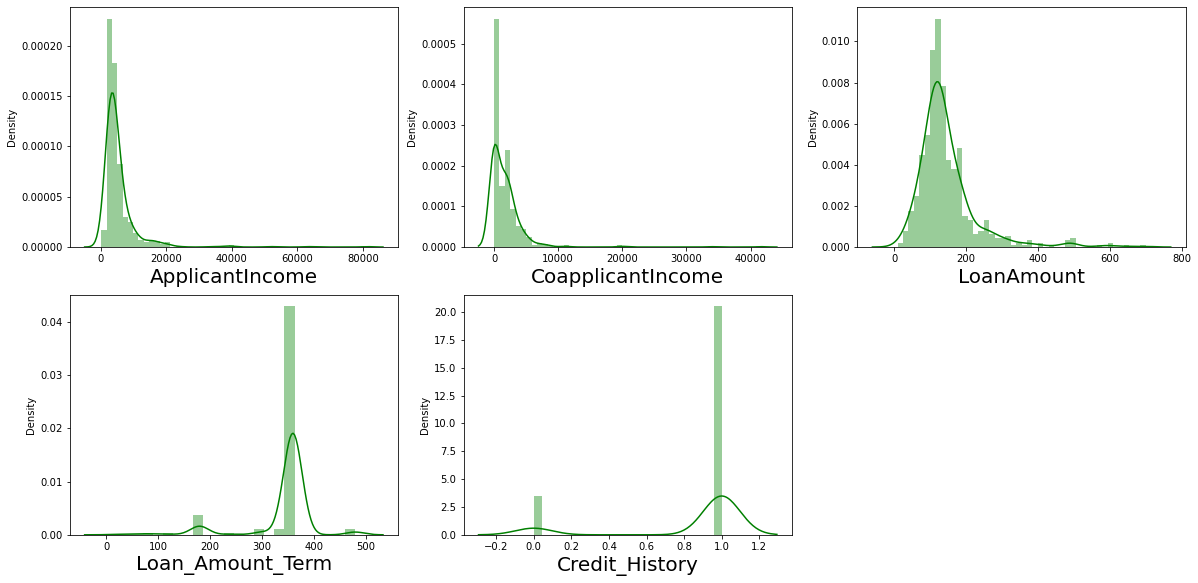

In [30]:
plt.figure(figsize=(20,15))
plotnum = 1
for column in num_col:
    if plotnum<=6:
        ax=plt.subplot(3,3,plotnum)
        sns.distplot(df[column], color='green')
        plt.xlabel(column, fontsize=20)
    plotnum +=1
plt.show()

From the above distribution plot we can observe:


    The data is not normally distributed in almost all coulmns.
    The mean value is greater than the median in "ApplicantIncome", "CoapplicantIncome",and "LoanAmount. Hence they are skewed to right.
    The median is greater than the mean value in "Loan_Amount_Term", and "Credit_History" mean they skewed towards left.



We have to remove the skewness to get better accuracy.


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


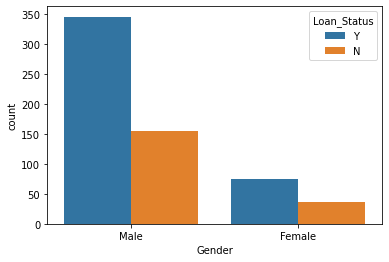

In [31]:
sns.countplot(df['Gender'],hue=df['Loan_Status'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


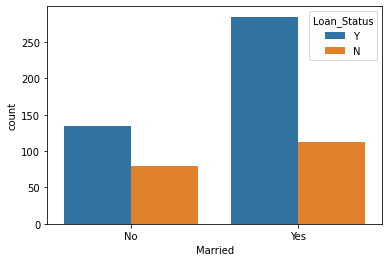

In [32]:
sns.countplot(df['Married'],hue=df['Loan_Status'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


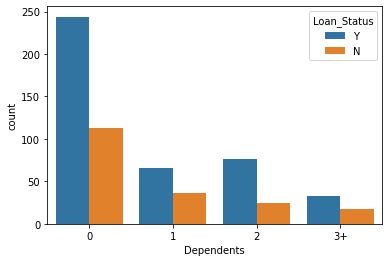

In [33]:
sns.countplot(df['Dependents'],hue=df['Loan_Status'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


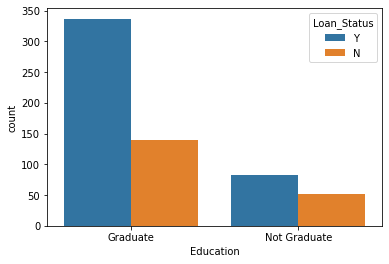

In [34]:
sns.countplot(df['Education'],hue=df['Loan_Status'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


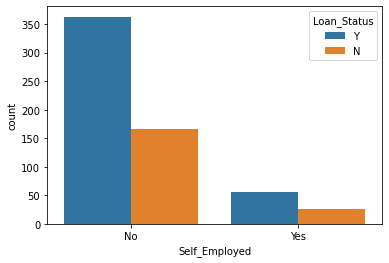

In [35]:
sns.countplot(df['Self_Employed'],hue=df['Loan_Status'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


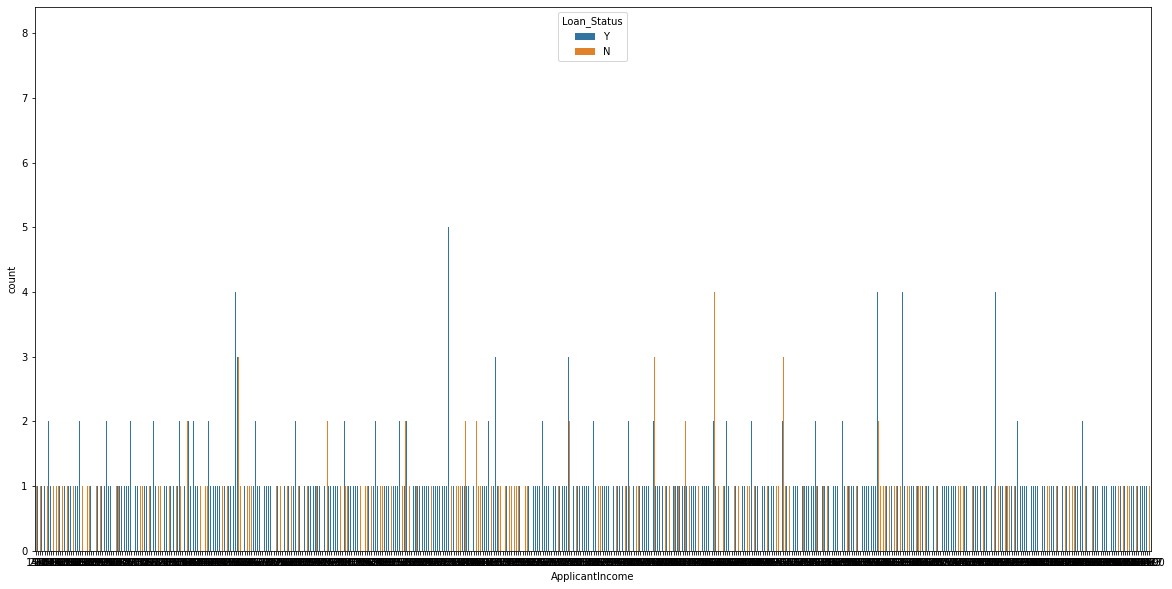

In [36]:
plt.figure(figsize=(20,10))
sns.countplot(df['ApplicantIncome'],hue=df['Loan_Status'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


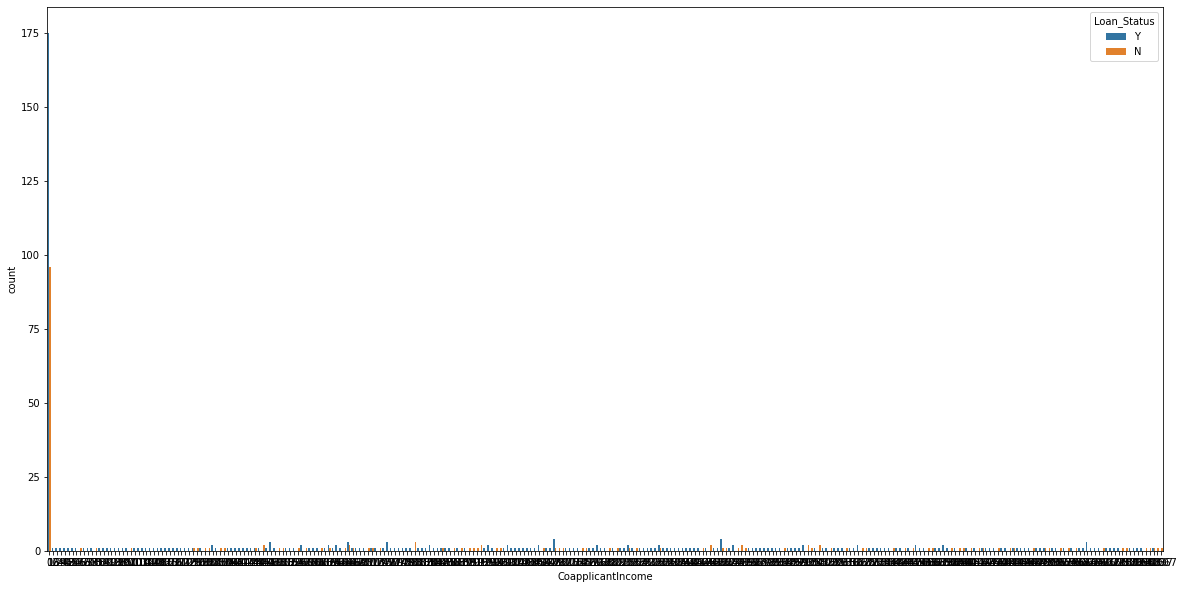

In [37]:
plt.figure(figsize=(20,10))
sns.countplot(df['CoapplicantIncome'],hue=df['Loan_Status'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


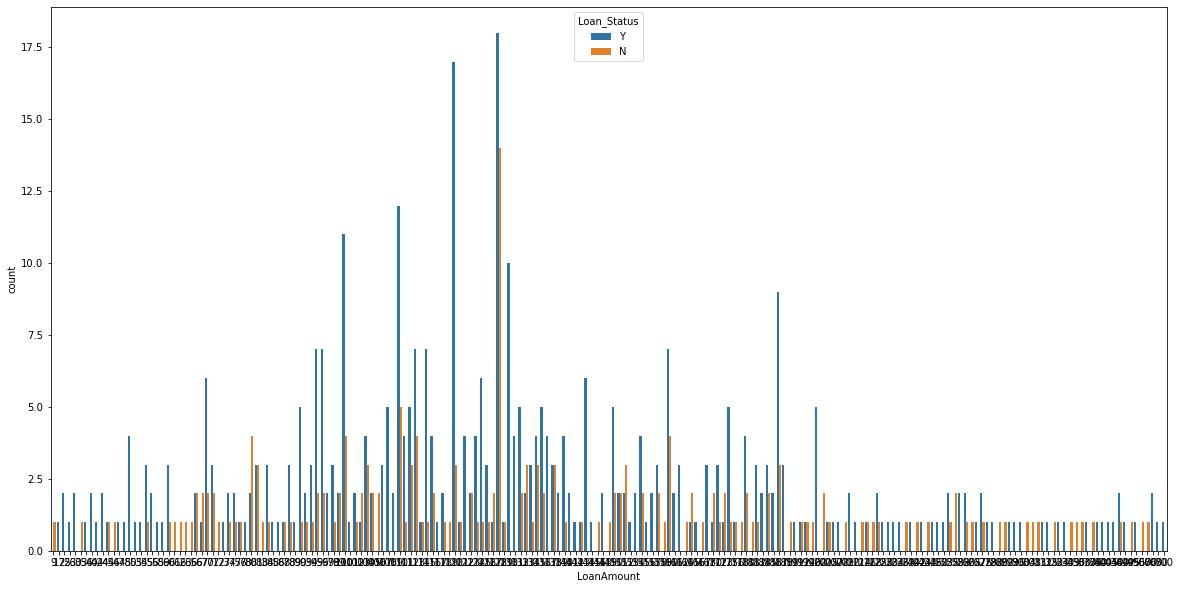

In [38]:
plt.figure(figsize=(20,10))
sns.countplot(df['LoanAmount'],hue=df['Loan_Status'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


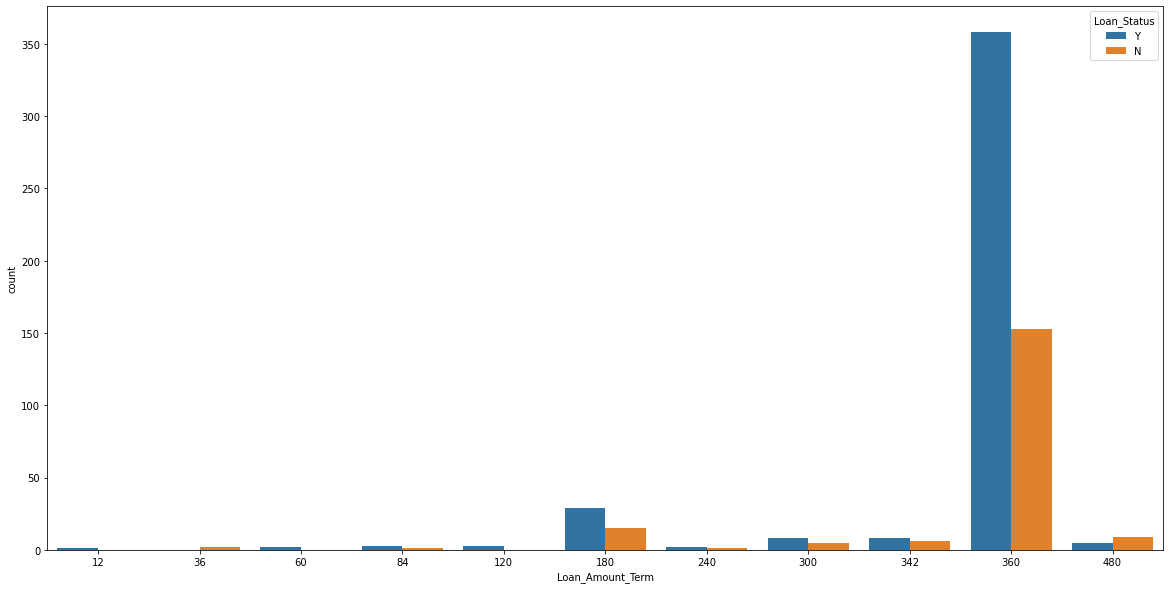

In [39]:
plt.figure(figsize=(20,10))
sns.countplot(df['Loan_Amount_Term'],hue=df['Loan_Status'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


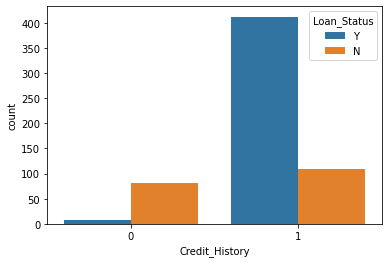

In [40]:
sns.countplot(df['Credit_History'],hue=df['Loan_Status'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


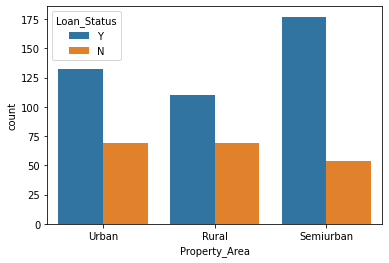

In [41]:
sns.countplot(df['Property_Area'],hue=df['Loan_Status'])
plt.show()

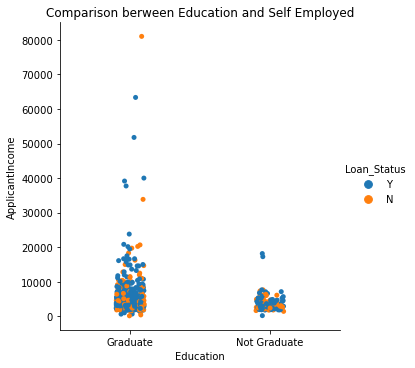

In [42]:
sns.catplot(x="Education",y="ApplicantIncome",data=df, hue="Loan_Status")
plt.title('Comparison berween Education and Self Employed')
plt.show()

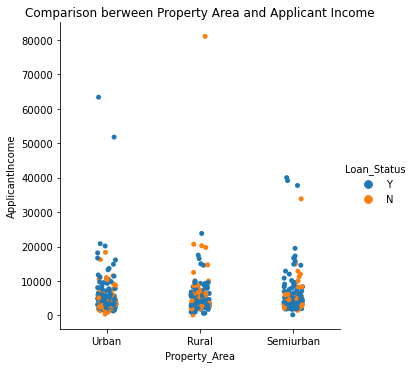

In [43]:
sns.catplot(x="Property_Area",y="ApplicantIncome",data=df, hue="Loan_Status")
plt.title('Comparison berween Property Area and Applicant Income')
plt.show()

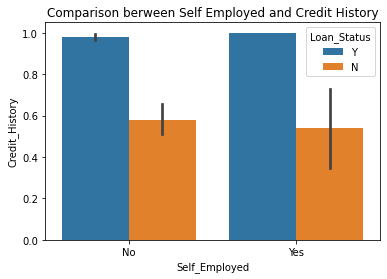

In [44]:
sns.barplot(x="Self_Employed",y="Credit_History",data=df, hue="Loan_Status")
plt.title('Comparison berween Self Employed and Credit History')
plt.show()

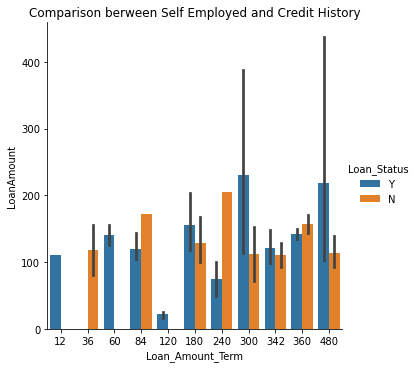

In [45]:
sns.catplot(x="Loan_Amount_Term",y="LoanAmount",data=df,kind="bar", hue="Loan_Status")
plt.title('Comparison berween Self Employed and Credit History')
plt.show()

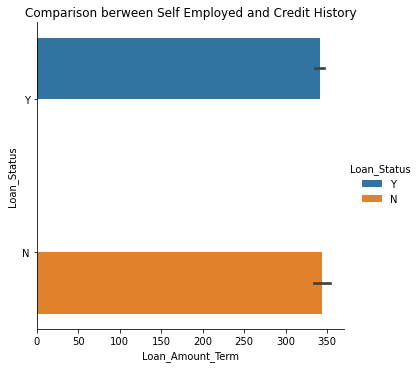

In [46]:
sns.catplot(x="Loan_Amount_Term",y="Loan_Status",data=df,kind="bar" ,hue="Loan_Status")
plt.title('Comparison berween Self Employed and Credit History')
plt.show()

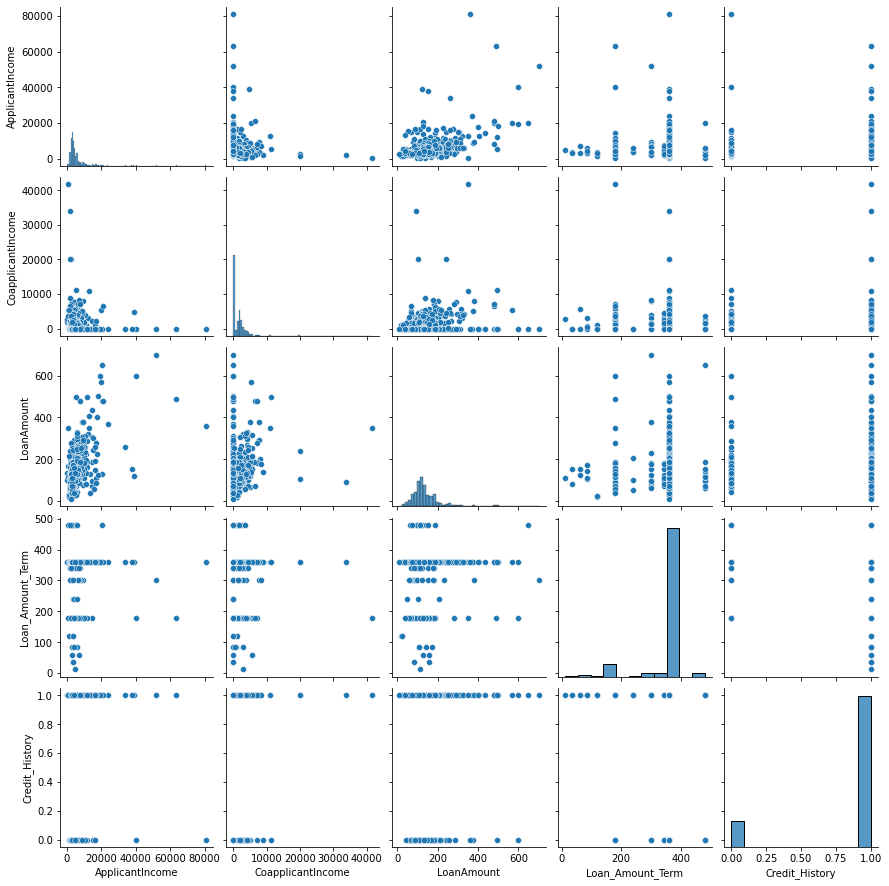

In [47]:
sns.pairplot(df)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.forma

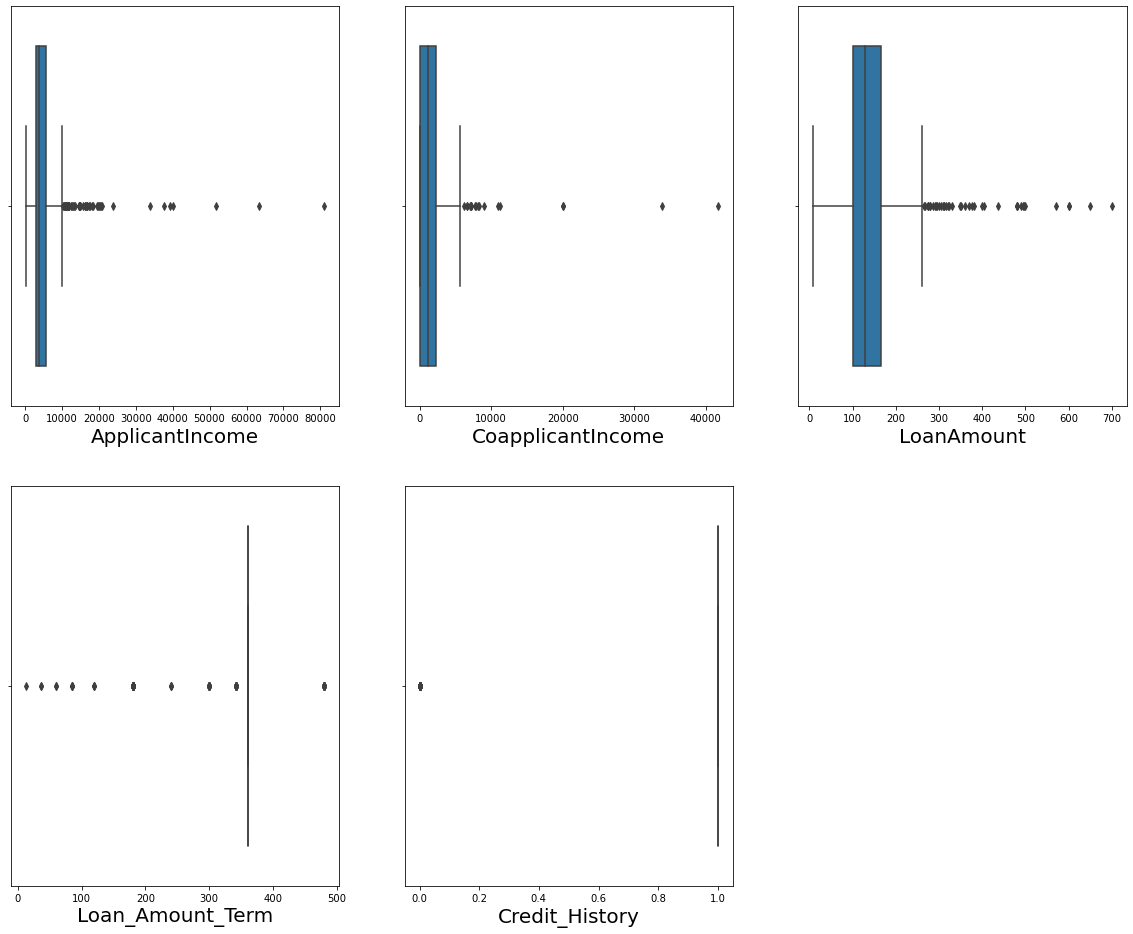

In [48]:
plt.figure(figsize=(20,25))
plot=1

for column in num_col:
    if plot <=6:
        plt.subplot(3,3,plot)
        ax=sns.boxplot(df[column],orient='v')
        plt.xlabel(column, fontsize=20)
    plot +=1
plt.show()

Inter Quantile Method: To remove the outliers

In [49]:
q1=df.quantile(.25)
q3=df.quantile(.75)
iqr=q3-q1

df1=df[~((df<(q1-1.5*iqr))|(df>(1.5*iqr+q3))).any(axis=1)]
df1.reset_index(inplace=True)
df1

C:\Users\HP\AppData\Local\Temp/ipykernel_22184/3521652691.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df1=df[~((df<(q1-1.5*iqr))|(df>(1.5*iqr+q3))).any(axis=1)]


,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,Male,No,0,Graduate,No,5849,0,128,360,1,Urban,Y
1,1,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
2,2,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
3,3,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
4,4,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,604,Male,Yes,2,Not Graduate,No,3987,1411,157,360,1,Rural,Y
383,605,Male,Yes,0,Graduate,No,3232,1950,108,360,1,Rural,Y
384,606,Female,No,0,Graduate,No,2900,0,71,360,1,Rural,Y
385,608,Male,Yes,1,Graduate,No,8072,240,253,360,1,Urban,Y


We can observe an outliers present in some columns. 

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\

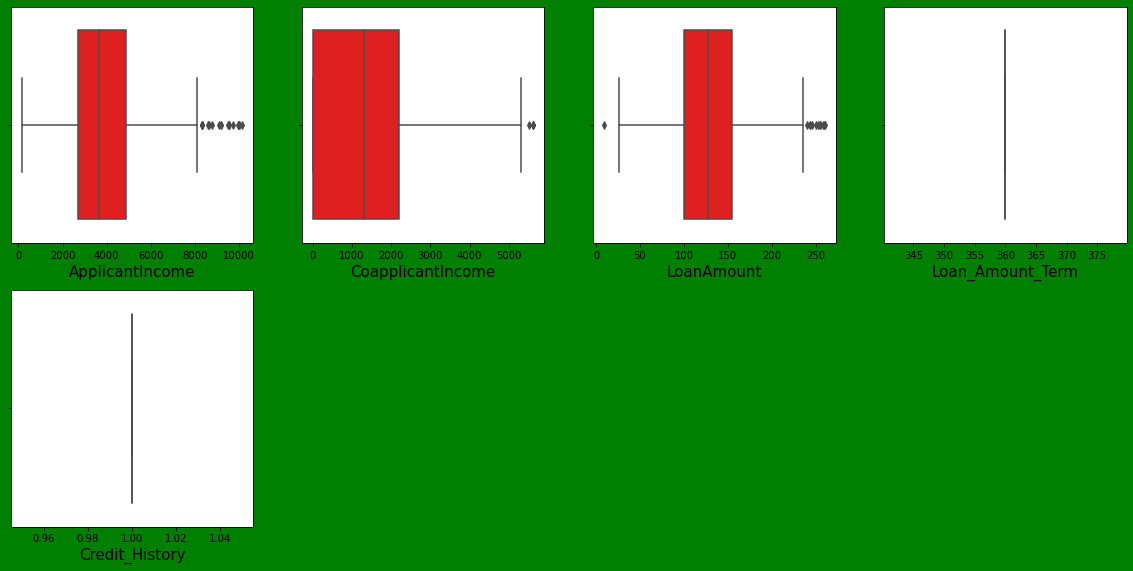

In [50]:
plt.figure(figsize=(20,20), facecolor='green')
plotnum = 1
for col in num_col:
    if plotnum <=6:
        ax=plt.subplot(4,4,plotnum)
        sns.boxplot(df1[col],color='red')
        plt.xlabel(col, fontsize=15)
    plotnum +=1
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


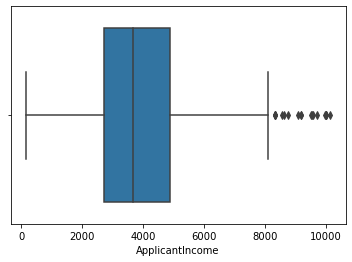

In [51]:
df1['Loan_Amount_Term'].value_counts()
sns.boxplot(df1['ApplicantIncome'])
plt.show()

In [52]:
df1.skew()   # outliers are removed now ckeck the skewness of same data.

C:\Users\HP\AppData\Local\Temp/ipykernel_22184/1454872859.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.skew()   # outliers are removed now ckeck the skewness of same data.


index                0.042490
ApplicantIncome      1.132351
CoapplicantIncome    0.846330
LoanAmount           0.481271
Loan_Amount_Term     0.000000
Credit_History       0.000000
dtype: float64

In [53]:
data_loss_after_balance=(1-(611-387)/611)*100
data_loss_after_balance # due to removal of the outlier index from column.

63.338788870703766

Zscore method: to remove the outliers

In [56]:
feat=df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]
from scipy.stats import zscore
z=np.abs(zscore(feat))
threshold=3
df2=df[(z<3).all(axis=1)]
df2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0,128,360,1,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
4,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
606,Female,No,0,Graduate,No,2900,0,71,360,1,Rural,Y
607,Male,Yes,3+,Graduate,No,4106,0,40,180,1,Rural,Y
608,Male,Yes,1,Graduate,No,8072,240,253,360,1,Urban,Y
609,Male,Yes,2,Graduate,No,7583,0,187,360,1,Urban,Y


In [60]:
data_balance=(1-(614-574)/614)*100
data_balance

93.48534201954396

In [61]:
df2.skew()

C:\Users\HP\AppData\Local\Temp/ipykernel_22184/834593052.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2.skew()


ApplicantIncome      2.159707
CoapplicantIncome    1.344042
LoanAmount           1.153126
Loan_Amount_Term    -2.141915
Credit_History      -1.967452
dtype: float64

Hence here we go through the Zscore beacuse zscore have less loss of data.

In [62]:
#skewww=df[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','Loan_Amount_Term','Credit_History']]

#df['Gender']=np.sqrt(df['Gender'])
#df['Education']=np.sqrt(df['Education'])
#df['Self_Employed']=np.cbrt(df['Self_Employed'])
#df['ApplicantIncome']=np.sqrt(df['ApplicantIncome'])
#df['LoanAmount']=np.sqrt(df['LoanAmount'])
#df['Loan_Amount_Term']=np.cbrt(df['Loan_Amount_Term'])
#df['Credit_History']=np.cbrt(df['Credit_History'])
#df['Loan_Status']=np.sqrt(df['Loan_Status'])
#df['Loan_Amount_Term']=np.square(df['Loan_Amount_Term'])# to decrease the value of skew,first we have take cbrt after applying its get more skewed than we square it.

In [63]:
df2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0,128,360,1,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
4,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
606,Female,No,0,Graduate,No,2900,0,71,360,1,Rural,Y
607,Male,Yes,3+,Graduate,No,4106,0,40,180,1,Rural,Y
608,Male,Yes,1,Graduate,No,8072,240,253,360,1,Urban,Y
609,Male,Yes,2,Graduate,No,7583,0,187,360,1,Urban,Y


In [64]:
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer(method='yeo-johnson')

In [65]:
skew=["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History"]
df2[skew]=scaler.fit_transform(df2[skew].values)
df2.skew()

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\HP\AppData\Local\Temp/ipykernel_22184/3675500115.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2.skew()


ApplicantIncome      0.027975
CoapplicantIncome   -0.196406
LoanAmount           0.047806
Loan_Amount_Term     0.755855
Credit_History      -1.967452
dtype: float64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an 

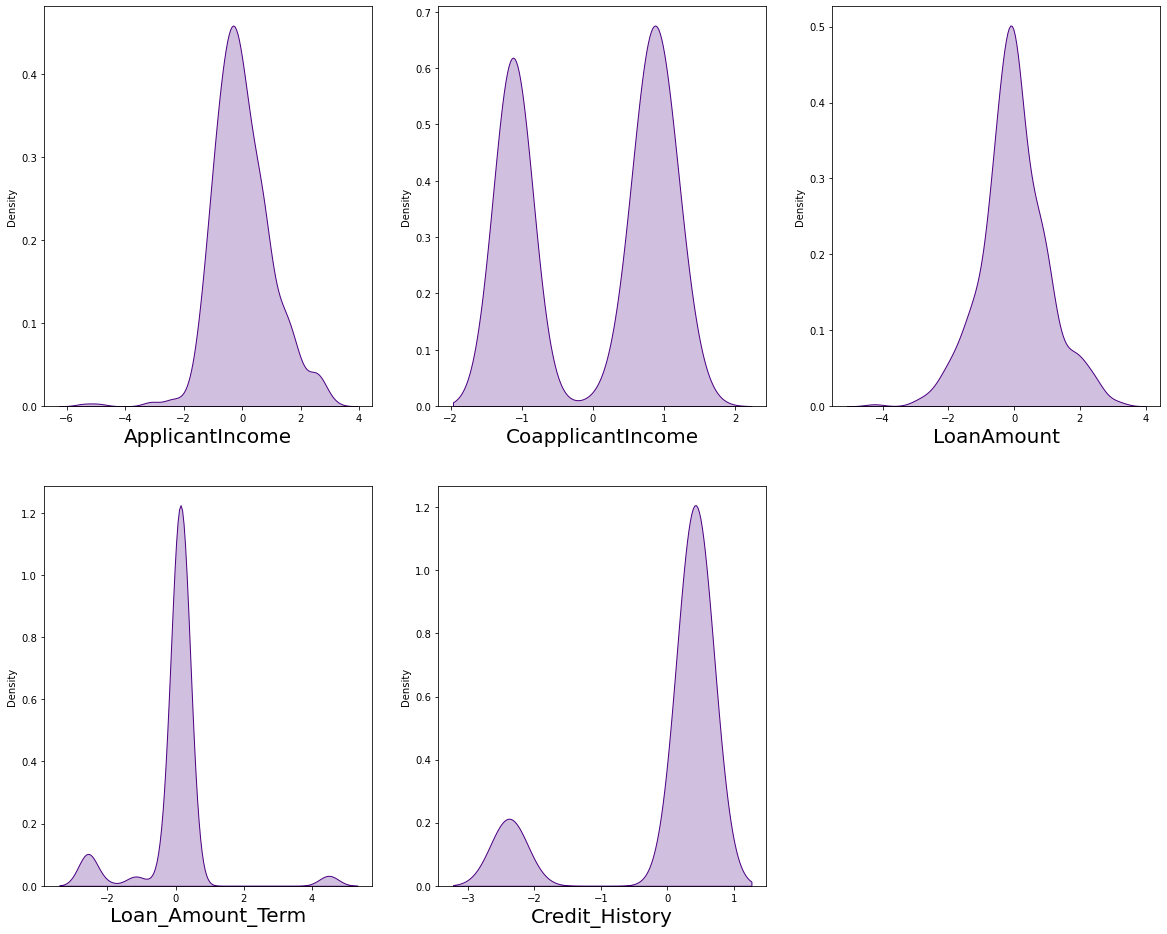

In [66]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df2[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df2[column],color='indigo',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [67]:
df2.reset_index(inplace=True)
df2

,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,Male,No,0,Graduate,No,0.685140,-1.125103,0.003283,0.145796,0.419797,Urban,Y
1,1,Male,Yes,1,Graduate,No,0.238197,0.740028,0.003283,0.145796,0.419797,Rural,N
2,2,Male,Yes,0,Graduate,Yes,-0.523797,-1.125103,-1.433052,0.145796,0.419797,Urban,Y
3,3,Male,Yes,0,Not Graduate,No,-0.788602,0.892552,-0.150712,0.145796,0.419797,Urban,Y
4,4,Male,No,0,Graduate,No,0.732199,-1.125103,0.240222,0.145796,0.419797,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,606,Female,No,0,Graduate,No,-0.583977,-1.125103,-1.289554,0.145796,0.419797,Rural,Y
570,607,Male,Yes,3+,Graduate,No,0.038810,-1.125103,-2.328853,-2.572795,0.419797,Rural,Y
571,608,Male,Yes,1,Graduate,No,1.284877,0.167199,1.841585,0.145796,0.419797,Urban,Y
572,609,Male,Yes,2,Graduate,No,1.167678,-1.125103,0.975887,0.145796,0.419797,Urban,Y


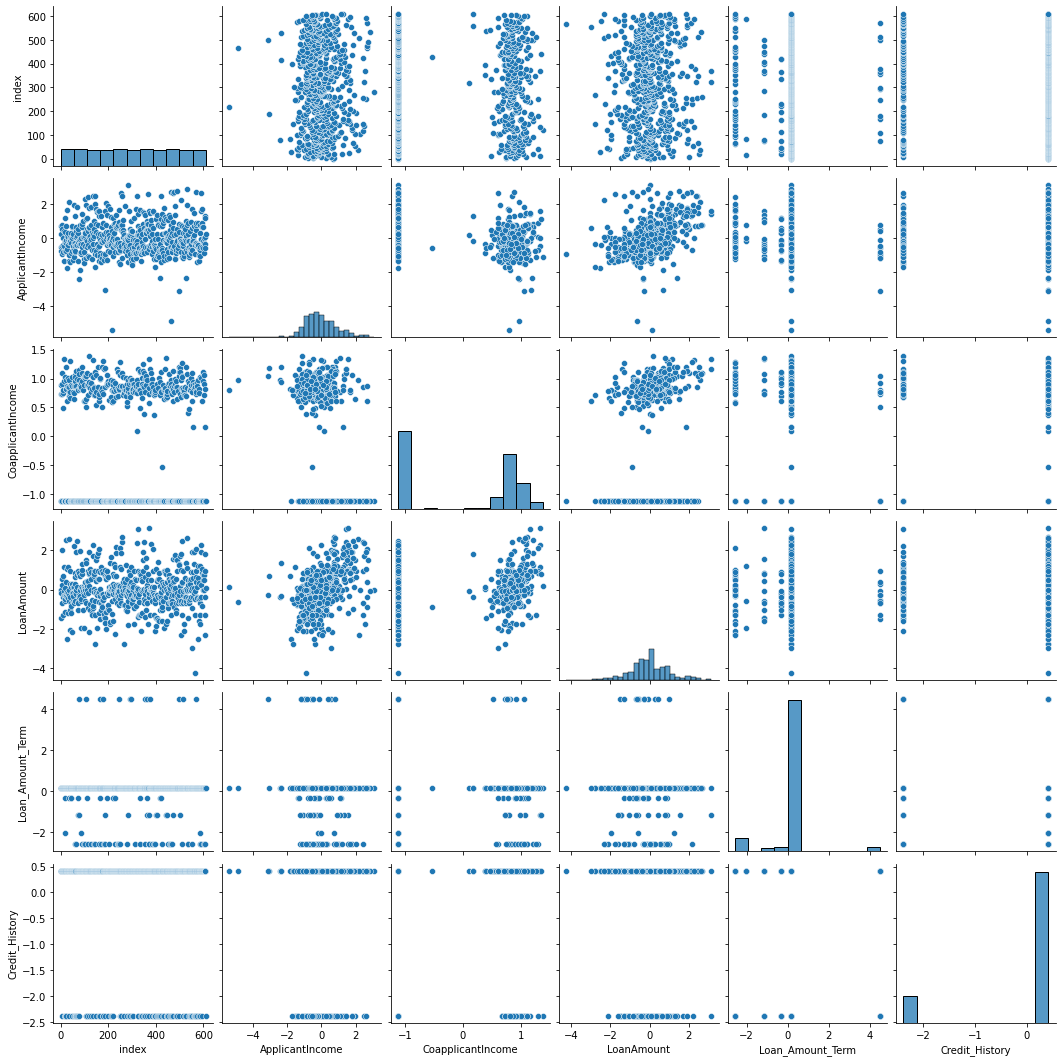

In [68]:
sns.pairplot(df2)

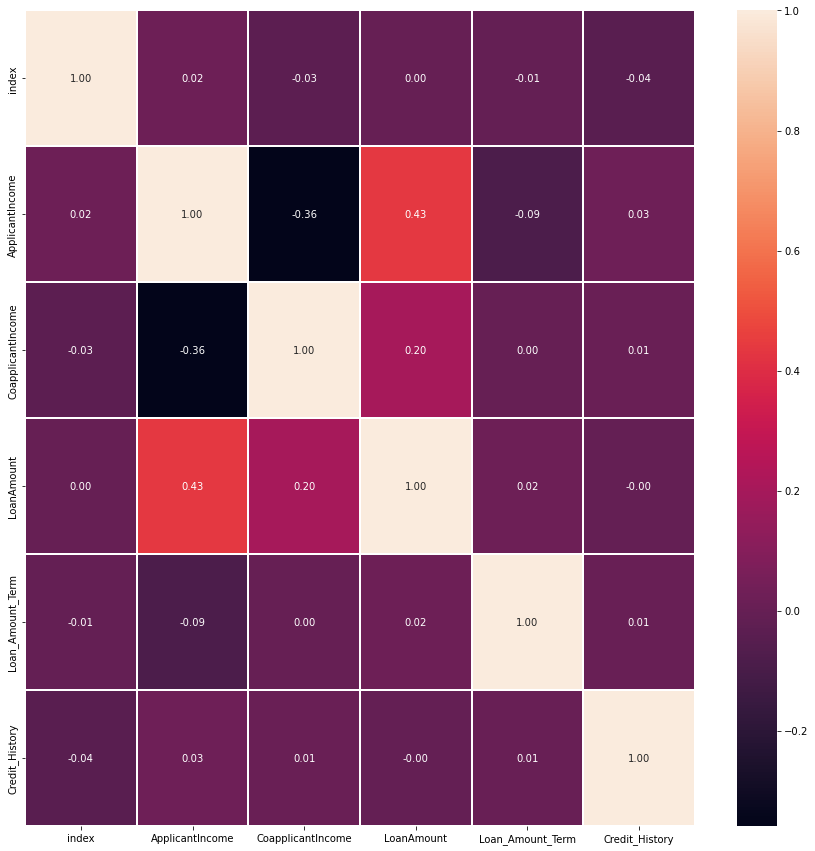

In [69]:
plt.figure(figsize=(15,15))
sns.heatmap(df2.corr(),annot=True,linewidths=.1,fmt='.2f')
plt.show()

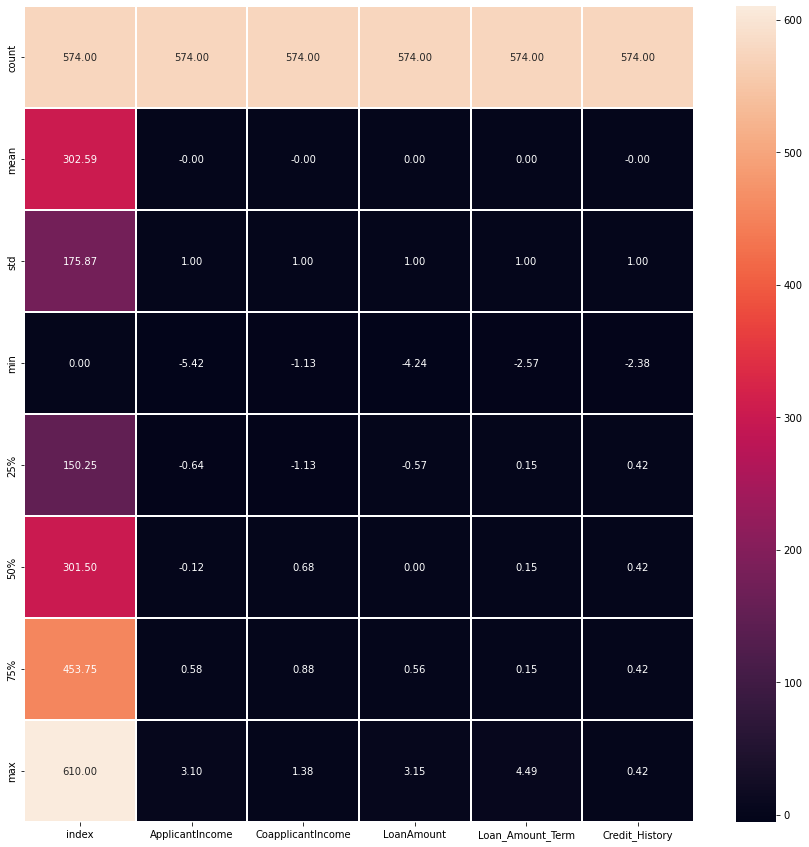

In [70]:
plt.figure(figsize=(15,15))
sns.heatmap(df2.describe(),annot=True,linewidths=.1,fmt='.2f')
plt.show()

Label Encoder:

In [71]:
df2.drop(columns=['index'],inplace=True)
df2

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,0.685140,-1.125103,0.003283,0.145796,0.419797,Urban,Y
1,Male,Yes,1,Graduate,No,0.238197,0.740028,0.003283,0.145796,0.419797,Rural,N
2,Male,Yes,0,Graduate,Yes,-0.523797,-1.125103,-1.433052,0.145796,0.419797,Urban,Y
3,Male,Yes,0,Not Graduate,No,-0.788602,0.892552,-0.150712,0.145796,0.419797,Urban,Y
4,Male,No,0,Graduate,No,0.732199,-1.125103,0.240222,0.145796,0.419797,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
569,Female,No,0,Graduate,No,-0.583977,-1.125103,-1.289554,0.145796,0.419797,Rural,Y
570,Male,Yes,3+,Graduate,No,0.038810,-1.125103,-2.328853,-2.572795,0.419797,Rural,Y
571,Male,Yes,1,Graduate,No,1.284877,0.167199,1.841585,0.145796,0.419797,Urban,Y
572,Male,Yes,2,Graduate,No,1.167678,-1.125103,0.975887,0.145796,0.419797,Urban,Y


In [72]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [73]:
cat_col=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
df2[cat_col]=df2[cat_col].apply(le.fit_transform)
df2

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.685140,-1.125103,0.003283,0.145796,0.419797,2,1
1,1,1,1,0,0,0.238197,0.740028,0.003283,0.145796,0.419797,0,0
2,1,1,0,0,1,-0.523797,-1.125103,-1.433052,0.145796,0.419797,2,1
3,1,1,0,1,0,-0.788602,0.892552,-0.150712,0.145796,0.419797,2,1
4,1,0,0,0,0,0.732199,-1.125103,0.240222,0.145796,0.419797,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
569,0,0,0,0,0,-0.583977,-1.125103,-1.289554,0.145796,0.419797,0,1
570,1,1,3,0,0,0.038810,-1.125103,-2.328853,-2.572795,0.419797,0,1
571,1,1,1,0,0,1.284877,0.167199,1.841585,0.145796,0.419797,2,1
572,1,1,2,0,0,1.167678,-1.125103,0.975887,0.145796,0.419797,2,1


In [74]:
df2.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.382604,0.187770,0.044842,-0.006996,0.065037,0.232489,0.172117,-0.111003,0.014070,-0.027614,0.018844
Married,0.382604,1.000000,0.333601,0.026955,-0.014345,-0.027335,0.339230,0.180887,-0.134132,0.017736,0.009152,0.086678
Dependents,0.187770,0.333601,1.000000,0.067910,0.043179,0.108824,0.001859,0.133365,-0.072252,-0.018741,0.003784,0.020460
Education,0.044842,0.026955,0.067910,1.000000,-0.008227,-0.174855,0.048136,-0.127724,-0.065859,-0.074122,-0.067653,-0.090935
Self_Employed,-0.006996,-0.014345,0.043179,-0.008227,1.000000,0.214123,-0.088674,0.118016,-0.052260,-0.015570,-0.027538,-0.025230
ApplicantIncome,0.065037,-0.027335,0.108824,-0.174855,0.214123,1.000000,-0.358669,0.433101,-0.086939,0.027513,-0.011067,-0.004719
CoapplicantIncome,0.232489,0.339230,0.001859,0.048136,-0.088674,-0.358669,1.000000,0.201518,0.002222,0.007807,-0.076056,0.081600
LoanAmount,0.172117,0.180887,0.133365,-0.127724,0.118016,0.433101,0.201518,1.000000,0.020385,-0.004496,-0.099514,-0.024887
Loan_Amount_Term,-0.111003,-0.134132,-0.072252,-0.065859,-0.052260,-0.086939,0.002222,0.020385,1.000000,0.005869,-0.032571,-0.058828
Credit_History,0.014070,0.017736,-0.018741,-0.074122,-0.015570,0.027513,0.007807,-0.004496,0.005869,1.000000,-0.008974,0.560384


Separating the columns into Feature(x) and target(y).

In [75]:
x=df2.drop('Loan_Status',axis=1)
y=df2['Loan_Status']

In [76]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,0.685140,-1.125103,0.003283,0.145796,0.419797,2
1,1,1,1,0,0,0.238197,0.740028,0.003283,0.145796,0.419797,0
2,1,1,0,0,1,-0.523797,-1.125103,-1.433052,0.145796,0.419797,2
3,1,1,0,1,0,-0.788602,0.892552,-0.150712,0.145796,0.419797,2
4,1,0,0,0,0,0.732199,-1.125103,0.240222,0.145796,0.419797,2
...,...,...,...,...,...,...,...,...,...,...,...
569,0,0,0,0,0,-0.583977,-1.125103,-1.289554,0.145796,0.419797,0
570,1,1,3,0,0,0.038810,-1.125103,-2.328853,-2.572795,0.419797,0
571,1,1,1,0,0,1.284877,0.167199,1.841585,0.145796,0.419797,2
572,1,1,2,0,0,1.167678,-1.125103,0.975887,0.145796,0.419797,2


In [77]:
y

0      1
1      0
2      1
3      1
4      1
      ..
569    1
570    1
571    1
572    1
573    0
Name: Loan_Status, Length: 574, dtype: int32

In [78]:
from sklearn.preprocessing import StandardScaler

scale=StandardScaler()

x=pd.DataFrame(scale.fit_transform(x), columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.475916,-1.357050,-0.726194,-0.543793,-0.381718,0.685140,-1.125103,0.003283,0.145796,0.419797,1.227882
1,0.475916,0.736893,0.278229,-0.543793,-0.381718,0.238197,0.740028,0.003283,0.145796,0.419797,-1.302834
2,0.475916,0.736893,-0.726194,-0.543793,2.619735,-0.523797,-1.125103,-1.433052,0.145796,0.419797,1.227882
3,0.475916,0.736893,-0.726194,1.838934,-0.381718,-0.788602,0.892552,-0.150712,0.145796,0.419797,1.227882
4,0.475916,-1.357050,-0.726194,-0.543793,-0.381718,0.732199,-1.125103,0.240222,0.145796,0.419797,1.227882
...,...,...,...,...,...,...,...,...,...,...,...
569,-2.101213,-1.357050,-0.726194,-0.543793,-0.381718,-0.583977,-1.125103,-1.289554,0.145796,0.419797,-1.302834
570,0.475916,0.736893,2.287074,-0.543793,-0.381718,0.038810,-1.125103,-2.328853,-2.572795,0.419797,-1.302834
571,0.475916,0.736893,0.278229,-0.543793,-0.381718,1.284877,0.167199,1.841585,0.145796,0.419797,1.227882
572,0.475916,0.736893,1.282651,-0.543793,-0.381718,1.167678,-1.125103,0.975887,0.145796,0.419797,1.227882


In [79]:
y.value_counts()

1    395
0    179
Name: Loan_Status, dtype: int64

In [80]:
from imblearn.over_sampling import SMOTE

In [81]:
sm=SMOTE()
x, y =sm.fit_resample(x, y)

In [82]:
y.value_counts()

1    395
0    395
Name: Loan_Status, dtype: int64

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Feature']=x.columns
vif['VIF']=[variance_inflation_factor(x,i ) for i in range(x.shape[1])]
vif

,Feature,VIF
0,Gender,1.264934
1,Married,1.474983
2,Dependents,1.170739
3,Education,1.066640
4,Self_Employed,1.065089
5,ApplicantIncome,1.790400
6,CoapplicantIncome,1.658593
7,LoanAmount,1.613037
8,Loan_Amount_Term,1.067478
9,Credit_History,1.015241


There is no multi-colinearity with the feature.

In [84]:
from sklearn.metrics import r2_score,accuracy_score, classification_report,roc_auc_score,roc_curve,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=i)
    rfc = RandomForestClassifier()
    rfc.fit(x_train,y_train)
    pred = rfc.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu,"at Random_state",maxRS)

Maximum r2 score is  0.5767857142857141 at Random_state 189


In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=133)

In [87]:
models=[LogisticRegression(),DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),RandomForestClassifier()]

def model_accuracy():
    for model in models:
       
    
        print(model)
        model.fit(x_train,y_train)
        model_predict=model.predict(x_test)
        print(accuracy_score(y_test,model_predict))
        print(confusion_matrix(y_test,model_predict))
        print(classification_report(y_test,model_predict))
        print(r2_score(y_test,model_predict))
        print(roc_auc_score(y_test,model_predict))
        print("-------------------------------------------------------------")


In [88]:
model_accuracy()

LogisticRegression()
0.70042194092827
[[ 62  68]
 [  3 104]]
              precision    recall  f1-score   support

           0       0.95      0.48      0.64       130
           1       0.60      0.97      0.75       107

    accuracy                           0.70       237
   macro avg       0.78      0.72      0.69       237
weighted avg       0.80      0.70      0.69       237

-0.20970524802300528
0.7244428468727534
-------------------------------------------------------------
DecisionTreeClassifier()
0.759493670886076
[[99 31]
 [26 81]]
              precision    recall  f1-score   support

           0       0.79      0.76      0.78       130
           1       0.72      0.76      0.74       107

    accuracy                           0.76       237
   macro avg       0.76      0.76      0.76       237
weighted avg       0.76      0.76      0.76       237

0.028828181164629596
0.759273903666427
-------------------------------------------------------------
SVC()
0.721518987341

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2

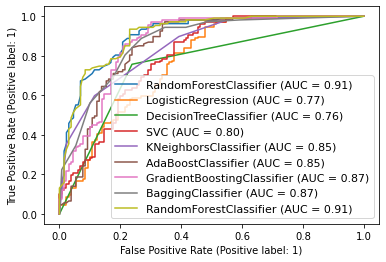

In [89]:
from sklearn.metrics import plot_roc_curve

dist=plot_roc_curve(RandomForestClassifier().fit(x_train,y_train),x_test,y_test)

for i in models:
    plot_roc_curve(i,x_test,y_test,ax=dist.ax_)
plt.legend(prop={'size':11}, loc= 'lower right')
plt.show()

In [90]:
r_model=RandomForestClassifier().fit(x_train,y_train)

In [91]:
import joblib
joblib.dump(r_model,'Loan Prediction.pkl')

['Loan Prediction.pkl']

In [92]:
mod=joblib.load('Loan Prediction.pkl')

compare=pd.DataFrame()
compare['Actual Value']=np.array(y_test)
compare['Predicted Value']=np.array(mod.predict(x_test))
compare

,Actual Value,Predicted Value
0,0,0
1,0,1
2,0,0
3,1,1
4,1,1
...,...,...
232,1,0
233,0,0
234,1,1
235,1,1
